**Data Loading and Inspection**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
#file upload and connect
data = pd.read_csv('/content/Cancer_Data.csv')

In [3]:
# Inspect the first few rows
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [4]:
# Get information about data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Data Cleaning**

In [5]:
# Drop unnecessary columns
data_cleaned = data.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

In [6]:
# Convert 'diagnosis' column to numeric: 1 for malignant, 0 for benign
data_cleaned['diagnosis'] = data_cleaned['diagnosis'].map({'M': 1, 'B': 0})

In [7]:
# Check for missing values
print(data_cleaned.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


**Exploratory Data Analysis (EDA)**

**Distribution of Target Variable**

<ipython-input-8-c23279e758b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=data_cleaned, palette='viridis')


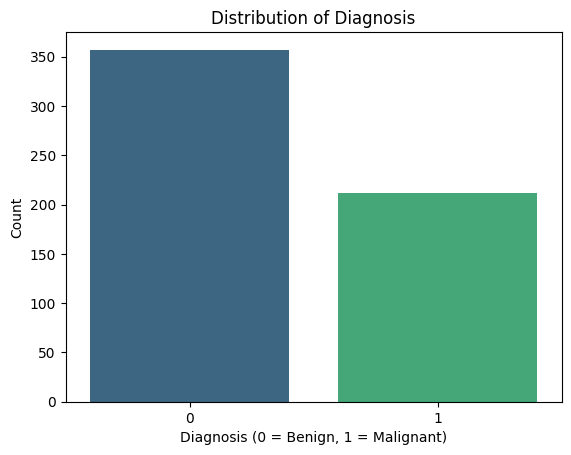

In [8]:
# Plot the distribution of the target variable
sns.countplot(x='diagnosis', data=data_cleaned, palette='viridis')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.show()

**Histograms and Density Plots for Numerical Features**

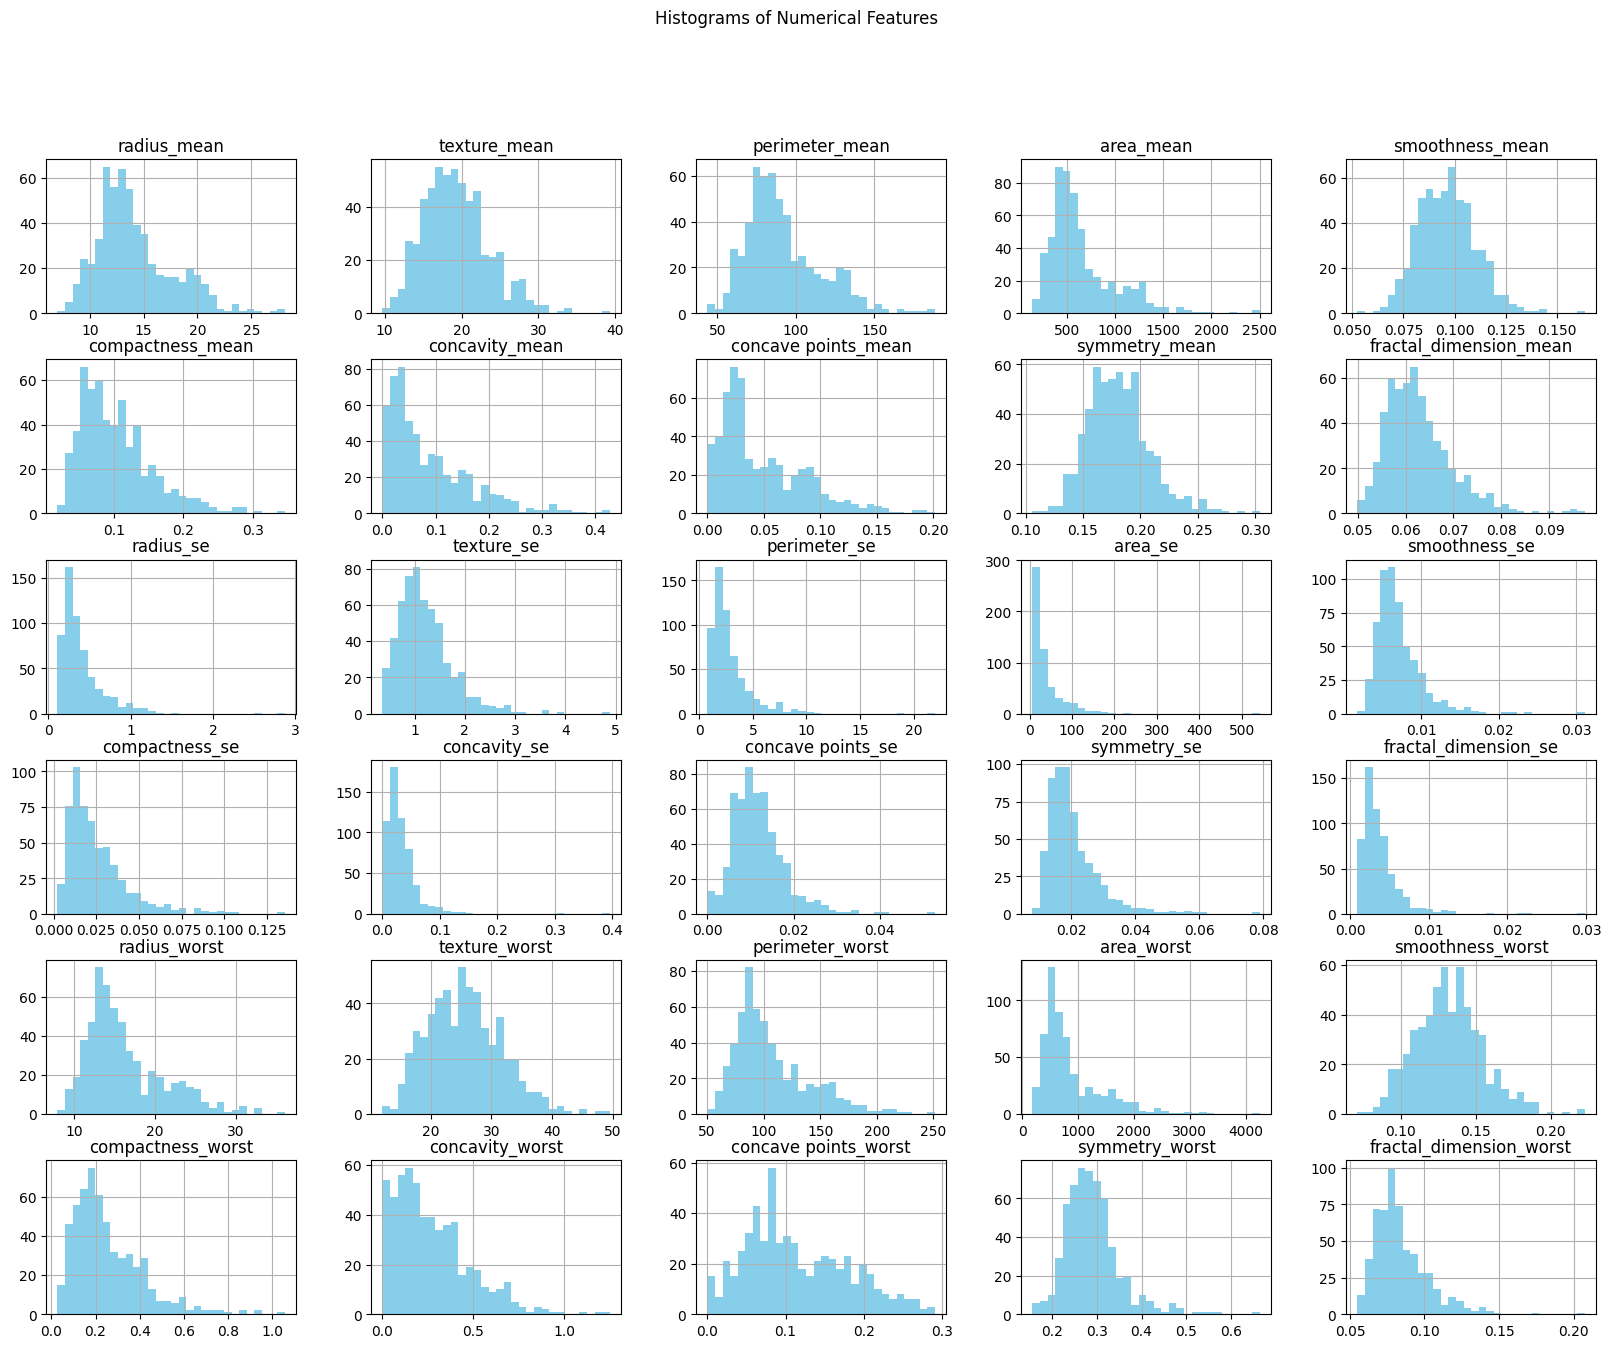

In [9]:
# Histograms for all numerical features
data_cleaned.drop(columns=['diagnosis']).hist(bins=30, figsize=(20, 15), color='skyblue')
plt.suptitle('Histograms of Numerical Features')
plt.show()

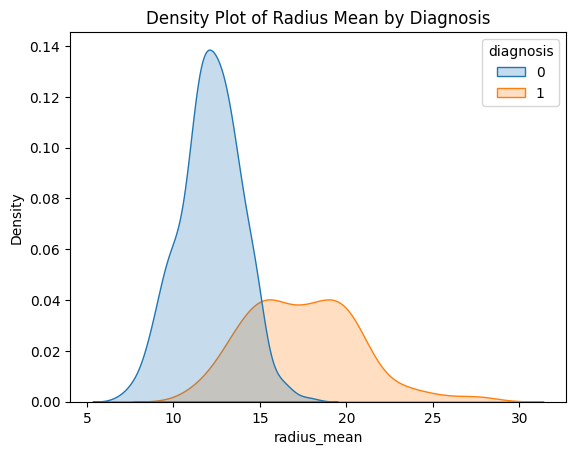

In [10]:
# Density plot for a specific feature
sns.kdeplot(data=data_cleaned, x='radius_mean', hue='diagnosis', fill=True)
plt.title('Density Plot of Radius Mean by Diagnosis')
plt.show()

**Feature Correlation**

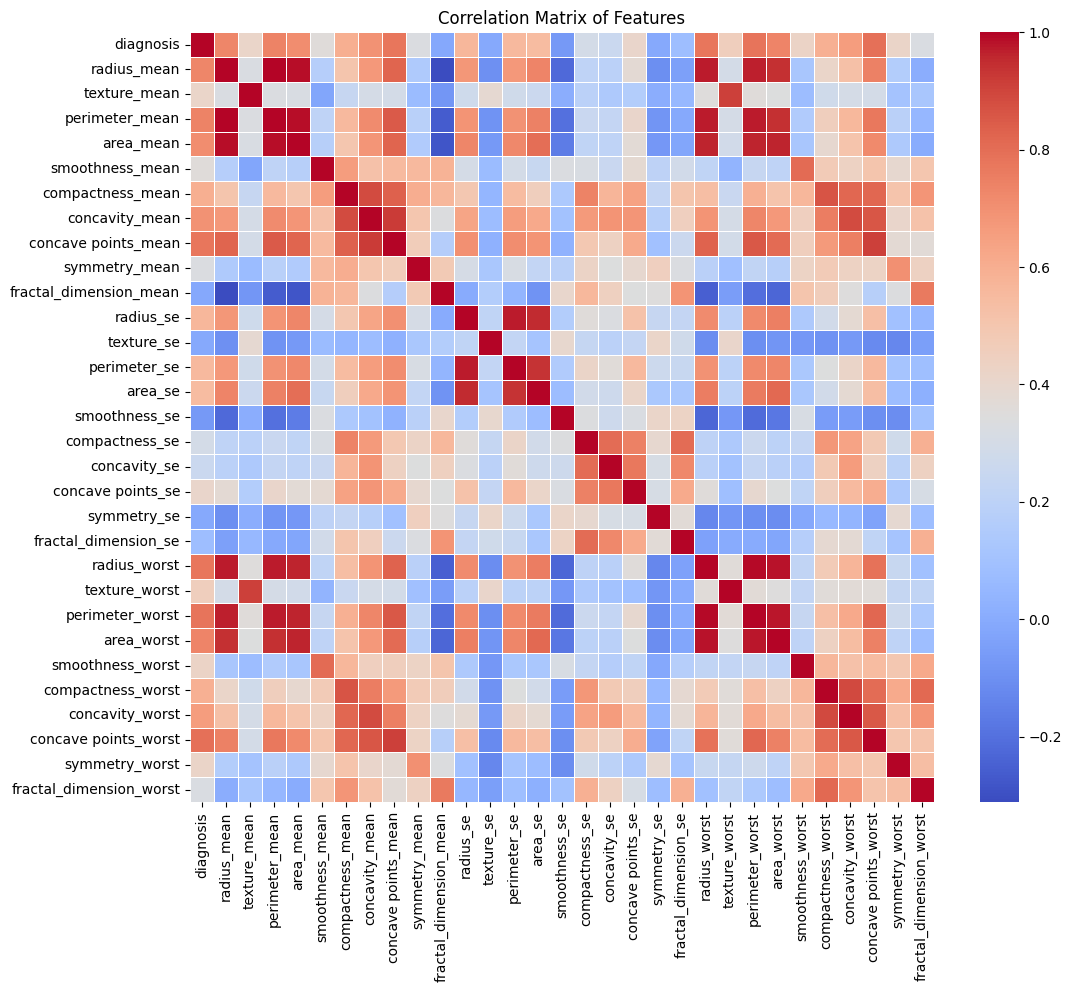

In [11]:
# Correlation matrix
corr_matrix = data_cleaned.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

**Pair Plot**

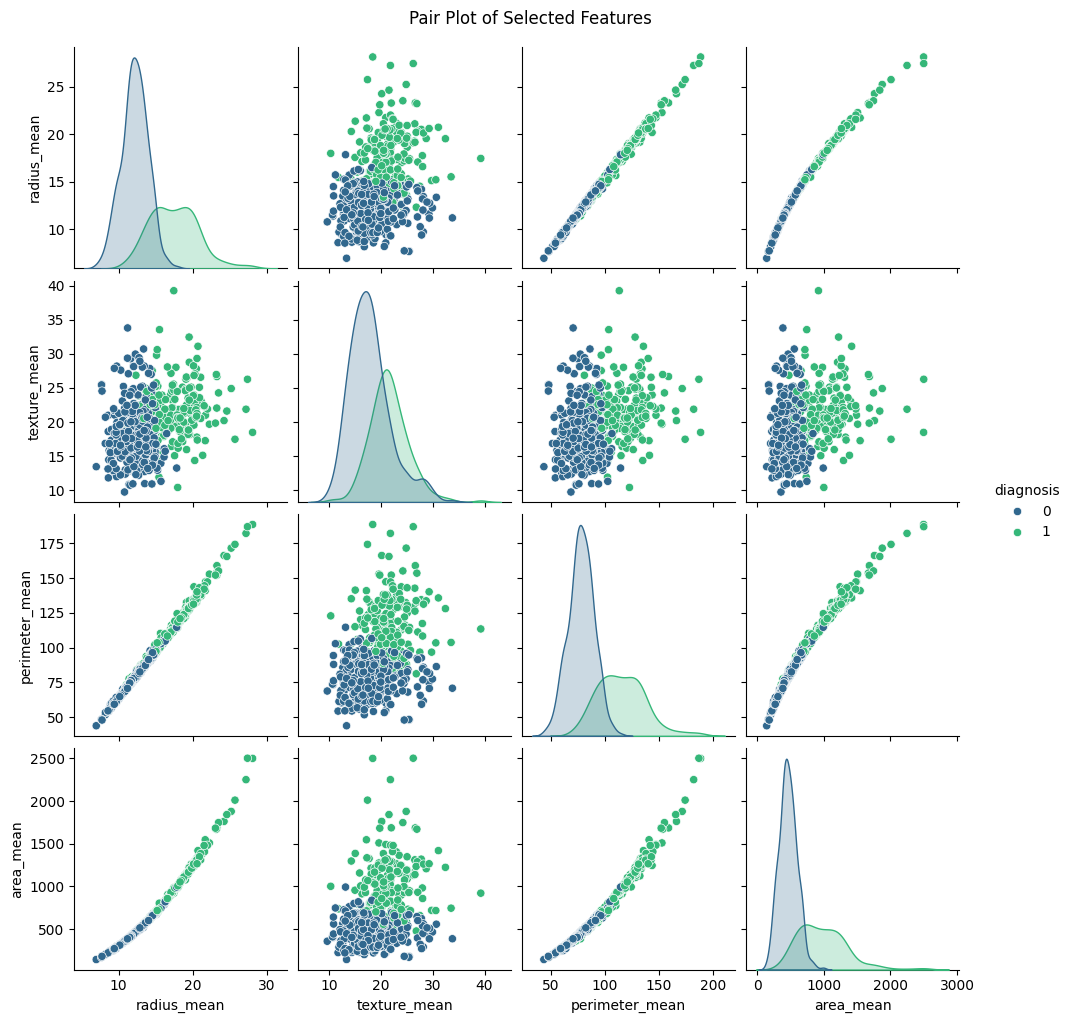

In [12]:
# Pair plot for a subset of features
sns.pairplot(data_cleaned[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']],
             hue='diagnosis', palette='viridis')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


**Box Plots for Feature Comparison**

<ipython-input-13-352c797f86d5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='area_mean', data=data_cleaned, palette='Set3')


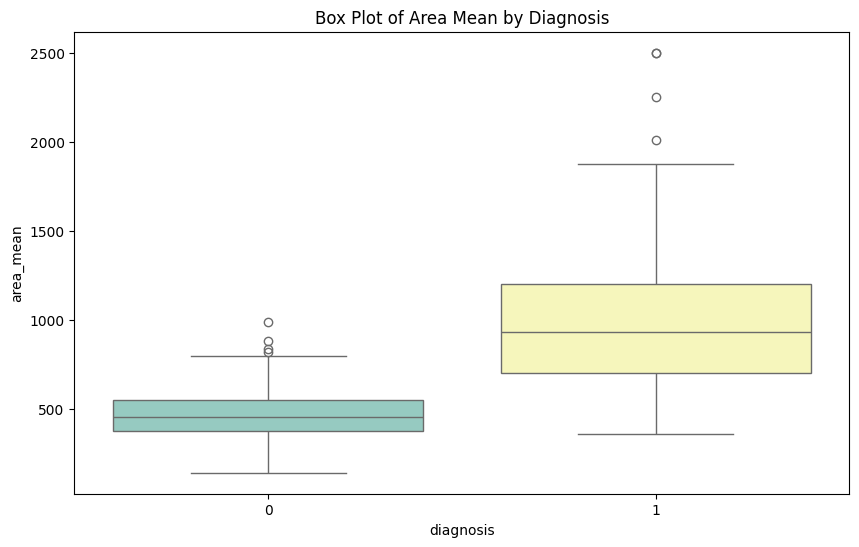

In [13]:
# Box plot for a specific feature
plt.figure(figsize=(10, 6))
sns.boxplot(x='diagnosis', y='area_mean', data=data_cleaned, palette='Set3')
plt.title('Box Plot of Area Mean by Diagnosis')
plt.show()

**Feature Engineering**

**Normalization/Standardization**

In [14]:
# Standardize the features
features = data_cleaned.drop(columns=['diagnosis'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert back to DataFrame
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)

**Feature Importance Visualization**

<ipython-input-15-370fdb0d818c>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


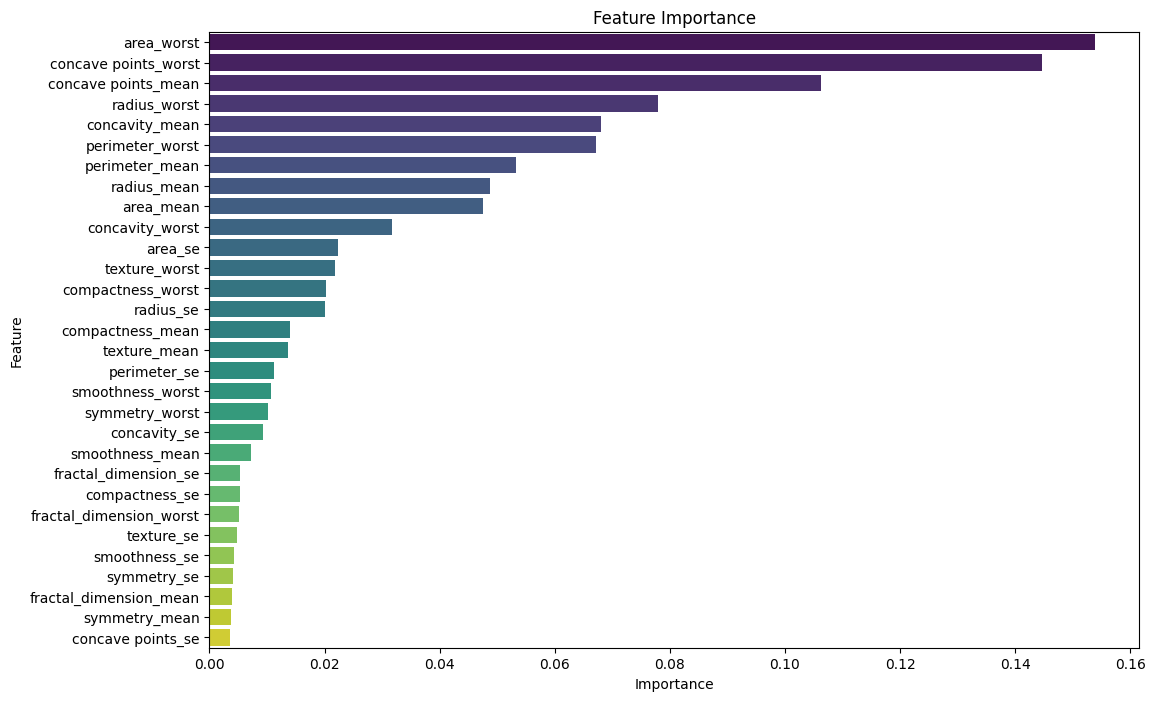

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Preprocess the data
# Split the data into features and target
X = data_cleaned.drop(columns=['diagnosis'])
y = data_cleaned['diagnosis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 2: Train the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 3: Plot the feature importance
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()

**Splitting the Dataset**

In [16]:
# Split the data into features and target
X = features_scaled
y = data_cleaned['diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Selection and Training**

In [17]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Model Evaluation**

Accuracy: 96.49%
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



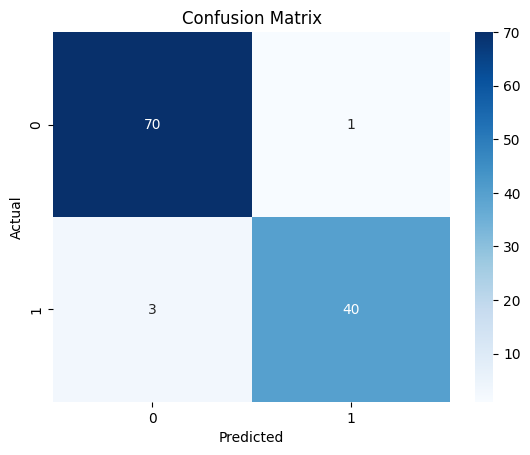

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Hyperparameter Tuning**

In [19]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Grid search for best parameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'max_depth': None, 'n_estimators': 200}


In [20]:
import joblib

# Save the trained model
joblib.dump(best_model, 'cancer_prediction_model.pkl')

# To load the model in future
loaded_model = joblib.load('/content/cancer_prediction_model.pkl')